<a href="https://colab.research.google.com/github/tcbic/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module1-linear-algebra-review/Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1 - Scalars and Vectors

For the questions below it is not sufficient to simply provide answer to the questions, but you must solve the problems and show your work using python (the NumPy library will help a lot!) Translate the vectors and matrices into their appropriate python  representations and use numpy or functions that you write yourself to demonstrate the result or property. 

## 1.1 Create a two-dimensional vector and plot it on a graph.

In [0]:
import matplotlib.pyplot as plt
import numpy as np

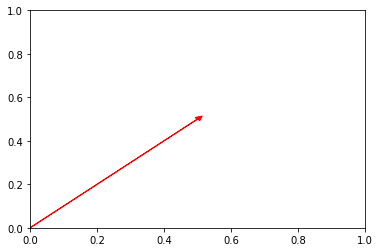

In [0]:
red = [.5, .5]

plt.arrow(0, 0, .5, .5, head_width=.02, head_length=.02 , color='r');

## 1.2 Create a three-dimensional vector and plot it on a graph.

In [0]:
from mpl_toolkits.mplot3d import Axes3D

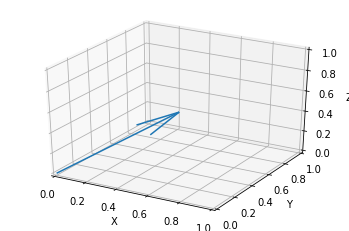

In [0]:
red = [.5, .5, .5]

vector = np.array([[0, 0, 0, .5, .5, .5]])

X, Y, Z, U, V, W = zip(*vector)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W, length=1)
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

## 1.3 Scale the vector you created in 1.1 by $5$, $\pi$, and $-e$ and plot all four vectors (original + 3 scaled vectors) on a graph. What do you notice about these vectors? 

In [0]:
import math
from math import e

In [0]:
#original vector

red = [.5, .5]

#scaled vectors

green = np.multiply(5, red)

orange = np.multiply(math.pi, red)

blue = np.multiply(-e, red)

In [0]:
print(green)
print(orange)
print(blue)

[2.5 2.5]
[1.57079633 1.57079633]
[-1.35914091 -1.35914091]


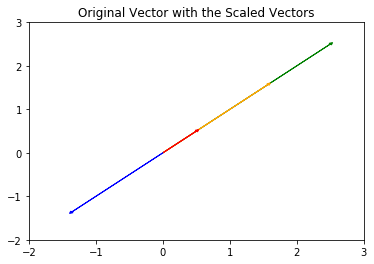

In [0]:
#Graph the vectors.

plt.arrow(0,0, green[0], green[1],head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, orange[0], orange[1],head_width=.05, head_length=0.05, color ='orange')
plt.arrow(0,0, red[0], red[1],head_width=.05, head_length=0.05, color ='red')
plt.arrow(0,0, blue[0], blue[1],head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-2,3)          
plt.ylim(-2,3)
plt.title("Original Vector with the Scaled Vectors")
plt.show()

In [0]:
#We observe that these vectors all fall on the same line.

## 1.4 Graph vectors $\vec{a}$ and $\vec{b}$ and plot them on a graph.

\begin{align}
\vec{a} = \begin{bmatrix} 5 \\ 7 \end{bmatrix}
\qquad
\vec{b} = \begin{bmatrix} 3 \\4 \end{bmatrix}
\end{align}

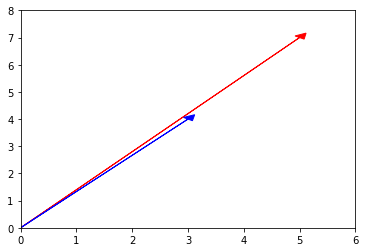

In [4]:
a = [5, 7]

b = [3, 4]

plt.arrow(0, 0, 5, 7, head_width=.2, head_length=.2 , color='r')
plt.arrow(0, 0, 3, 4, head_width=.2, head_length=.2 , color='b')
plt.xlim(0,6)          
plt.ylim(0,8);

## 1.5 Find $\vec{a} - \vec{b}$ and plot the result on the same graph as $\vec{a}$ and $\vec{b}$. Is there a relationship between vectors $\vec{a} \thinspace, \vec{b} \thinspace \text{and} \thinspace \vec{a-b}$?

In [0]:
a = np.array([5, 7])

b = np.array([3, 4])

a_minus_b = np.subtract(a, b)

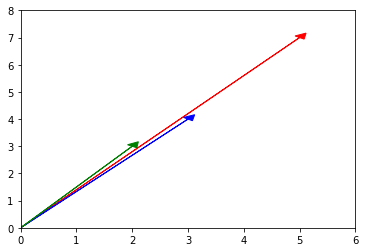

In [6]:
plt.arrow(0, 0, 5, 7, head_width=.2, head_length=.2 , color='r')
plt.arrow(0, 0, 3, 4, head_width=.2, head_length=.2 , color='b')
plt.arrow(0, 0, a_minus_b[0], a_minus_b[1], head_width=.2, head_length=.2 , color='g')
plt.xlim(0,6)          
plt.ylim(0,8);

In [0]:
#Is there a relationship between these three vectors?

#We could look at the relationship of these three vectors as being geometric.

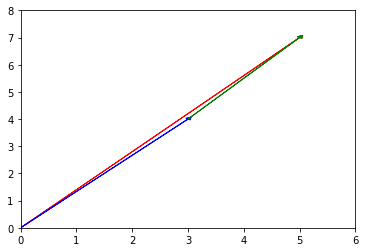

In [8]:
#This would be a better graphical representation of the geometric relationship.

plt.arrow(0, 0, 5, 7, head_width=.1, head_length=.1 , color='r')
plt.arrow(0, 0, 3, 4, head_width=.1, head_length=.1 , color='b')
plt.arrow(b[0],b[1], a_minus_b[0],a_minus_b[1], head_width=.1, head_length=.1 , color='g')
plt.xlim(0,6)          
plt.ylim(0,8);

## 1.6 Find $c \cdot d$

\begin{align}
\vec{c} = \begin{bmatrix}7 & 22 & 4 & 16\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}12 & 6 & 2 & 9\end{bmatrix}
\end{align}


In [0]:
  c = np.array([7, 22, 4, 16])
  
  d = np.array([12, 6, 2, 9])
  
  c_dot_d = np.dot(c, d)
  
  c_dot_d

368

##  1.7 Find $e \times f$

\begin{align}
\vec{e} = \begin{bmatrix} 5 \\ 7 \\ 2 \end{bmatrix}
\qquad
\vec{f} = \begin{bmatrix} 3 \\4 \\ 6 \end{bmatrix}
\end{align}

In [0]:
e = np.array([5, 7, 2])

f = np.array([3, 4, 6])

e_cross_f = np.cross(e, f)

e_cross_f

array([ 34, -24,  -1])

## 1.8 Find $||g||$ and then find $||h||$. Which is longer?

\begin{align}
\vec{g} = \begin{bmatrix} 1 \\ 1 \\ 1 \\ 8 \end{bmatrix}
\qquad
\vec{h} = \begin{bmatrix} 3 \\3 \\ 3 \\ 3 \end{bmatrix}
\end{align}

In [0]:
from numpy import linalg

In [5]:
g = np.array([1, 1, 1, 8])

h = np.array([3, 3, 3, 3])

print('Length of vector g:', linalg.norm(g))

print('Length of vector h:', linalg.norm(h))

Length of vector g: 8.18535277187245
Length of vector h: 6.0


In [0]:
#We see that the length of g is longer than the length of h.

## 1.9 Show that the following vectors are orthogonal (perpendicular to each other):

\begin{align}
\vec{g} = \begin{bmatrix} 1 \\ 0 \\ -1  \end{bmatrix}
\qquad
\vec{h} = \begin{bmatrix} 1 \\ \sqrt{2} \\ 1 \end{bmatrix}
\end{align}

In [0]:
#If these two vectors are orthogonal, the dot product of these vectors will be equal to 0.

g = np.array([1, 0, -1])

h = ([1, np.sqrt(2), 1])

g_dot_h = np.dot(g, h)

g_dot_h

0.0

In [0]:
#We see that the dot product of these two vectors is equal to 0 so therefore vector g and vector h are orthogonal.

# Part 2 - Matrices

## 2.1 What are the dimensions of the following matrices? Which of the following can be multiplied together? See if you can find all of the different legal combinations.
\begin{align}
A = \begin{bmatrix}
1 & 2 \\
3 & 4 \\
5 & 6
\end{bmatrix}
\qquad
B = \begin{bmatrix}
2 & 4 & 6 \\
\end{bmatrix}
\qquad
C = \begin{bmatrix}
9 & 6 & 3 \\
4 & 7 & 11
\end{bmatrix}
\qquad
D = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\qquad
E = \begin{bmatrix}
1 & 3 \\
5 & 7
\end{bmatrix}
\end{align}

In [0]:
#Dimensions of the matrices

#A: 3x2
#B: 1x3
#C: 2x3
#D: 3x3
#E: 2x2

#To multiply one matrix by another matrix, the number of columns in the first matrix must be equal to the number of rows in the second matrix.

#Matrix A can be multiplied by matrix C and E.
#Matrix B can be multiplied by matrix A and D.
#Matrix C can be multiplied by matrix A and D.
#Matrix D can be multiplied by matrix A.
#Matrix E can be multiplied by matrix C.

## 2.2 Find the following products: CD, AE, and BA. What are the dimensions of the resulting matrices? How does that relate to the dimensions of their factor matrices?

In [0]:
#Product of matrix C and matrix D

C = np.array([[9, 6, 3], [4, 7, 11]])

D = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

np.matmul(C, D)

#Dimensions of resulting matrix: 2x3

array([[ 9,  6,  3],
       [ 4,  7, 11]])

In [0]:
#Product of matrix A and matrix E

A = np.array([[1, 2], [3, 4], [5, 6]])

E = np.array([[1, 3], [5, 7]])

np.matmul(A, E)

#Dimensions of resulting matrix: 3x2

array([[11, 17],
       [23, 37],
       [35, 57]])

In [0]:
#Product of matrix B and matrix A

B = np.array([2, 4, 6])

np.matmul(B, A)

#Dimensions of resulting matrix: 1x2

array([44, 56])

## 2.3  Find $F^{T}$. How are the numbers along the main diagonal (top left to bottom right) of the original matrix and its transpose related? What are the dimensions of $F$? What are the dimensions of $F^{T}$?

\begin{align}
F = 
\begin{bmatrix}
20 & 19 & 18 & 17 \\
16 & 15 & 14 & 13 \\
12 & 11 & 10 & 9 \\
8 & 7 & 6 & 5 \\
4 & 3 & 2 & 1
\end{bmatrix}
\end{align}

In [0]:
F = np.array([[20, 19, 18, 17], [16, 15, 14, 13], [12, 11, 10, 9], [8, 7, 6, 5], [4, 3, 2, 1]])

In [0]:
#Transpose of F

F.T

array([[20, 16, 12,  8,  4],
       [19, 15, 11,  7,  3],
       [18, 14, 10,  6,  2],
       [17, 13,  9,  5,  1]])

In [0]:
#The main diagonal of a matrix consists of those elements that lie on the diagonal that runs from top left to bottom right.
#Even when we take the transpose of a matrix, the main diagonal of the matrix still remains unchanged.

In [0]:
#Dimensions of F: 5x4

In [0]:
#Dimensions of the transpose of F: 4x5

# Part 3 - Square Matrices

## 3.1 Find $IG$ (be sure to show your work) 😃

\begin{align}
G= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\end{align}

In [0]:
#Find the identity matrix of G.

#Matrix G dimensions: 2x2

identity_of_G = np.identity(2) #2 represents the number of rows and columns in the matrix G.

print(identity_of_G)

[[1. 0.]
 [0. 1.]]


In [0]:
#Prove the identity by multiplying the two matrices.

G = np.array([[12, 11], [7, 10]])

np.matmul(G, identity_of_G)

array([[12., 11.],
       [ 7., 10.]])

## 3.2 Find $|H|$ and then find $|J|$.

\begin{align}
H= 
\begin{bmatrix}
12 & 11 \\
7 & 10 
\end{bmatrix}
\qquad
J= 
\begin{bmatrix}
0 & 1 & 2 \\
7 & 10 & 4 \\
3 & 2 & 0
\end{bmatrix}
\end{align}


In [0]:
#Find the determinant of H.

H = np.array([[12, 11], [7, 10]])

print(linalg.det(H))

#the hand-written way

det_H = (12*10) - (11*7)

print(det_H)

43.000000000000014
43


In [0]:
#Find the determinant of J.

J = np.array([[0, 1, 2], [7, 10, 4], [3, 2, 0]])

linalg.det(J)

-19.999999999999996

## 3.3 Find H^{-1} and then find J^{-1}

In [0]:
#Find the inverse of H.

inv_H = linalg.inv(H)

print(inv_H)

[[ 0.23255814 -0.25581395]
 [-0.1627907   0.27906977]]


In [0]:
#Find the inverse of J.

inv_J = linalg.inv(J)

print(inv_J)

[[ 0.4  -0.2   0.8 ]
 [-0.6   0.3  -0.7 ]
 [ 0.8  -0.15  0.35]]


## 3.4 Find $HH^{-1}$ and then find $G^{-1}G$. Is $HH^{-1} == G^{-1}G$? Why or Why not?

In [0]:
#Find the product of H and the inverse of H.

np.matmul(H, inv_H).round()

array([[1., 0.],
       [0., 1.]])

In [0]:
#Find the product of the inverse of G and G.

inv_G = linalg.inv(G)

np.matmul(inv_G, G).round()


array([[1., 0.],
       [0., 1.]])

In [0]:
#Given the output, we see that H multiplied by the inverse of H and the inverse of G multiplied by G is equal. General rule: (A^-1)*A = A*(A^-1) = I

# Stretch Goals: 

A reminder that these challenges are optional. If you finish your work quickly we welcome you to work on them. If there are other activities that you feel like will help your understanding of the above topics more, feel free to work on that. Topics from the Stretch Goals sections will never end up on Sprint Challenges. You don't have to do these in order, you don't have to do all of them. 

- Write a function that can calculate the dot product of any two vectors of equal length that are passed to it.
- Write a function that can calculate the norm of any vector
- Prove to yourself again that the vectors in 1.9 are orthogonal by graphing them. 
- Research how to plot a 3d graph with animations so that you can make the graph rotate (this will be easier in a local notebook than in google colab)
- Create and plot a matrix on a 2d graph.
- Create and plot a matrix on a 3d graph.
- Plot two vectors that are not collinear on a 2d graph. Calculate the determinant of the 2x2 matrix that these vectors form. How does this determinant relate to the graphical interpretation of the vectors?

